# COGS 108 - Final Project 

# Overview

In this project, I tend to find how the factors about the Park distribution and performance affect the poverty rate and unemployment rate for the regions (ZIP codes) in San Diego. Specifically, the factors are:

- park_count: The number of parks in a region
- rating_mean: The average rating for the parks in a region
- review_count_total: The total count of the reviews for the parks in a region
- great_park_count: The count of great parks (rating >=4.5) in a region
- population: the total population of a region

By using linear regression model, I found that review_count_total and population have significant positive relationship (P<0.05 and coef>0) with poverty rate and unemployment rate. 

The park_count, rating_mean, and great_park_count have negative relationship with poverty rate and unemployment rate, but such relationship is not significant (P>0.05 and coef<0)

# Name & GitHub

- Name: Weihang Gao
- GitHub Username: LeoGao1

# Research Question

Which factors about San Diego park distribution affect the regional poverty rate and unemplyment rate in San Diego?

## Background and Prior Work

Park distributions are related to the social equality and can, to some extent, reflect the regional population composition. Some previous work include the relationship between urbrun service and social equality(1) and urban park geography(2)


For the Park distribution in San Diego, both the Yelp (3) and City of San Diego official websites (4) have the related data and work. In this project, I use the data from Yelp for the data about the San Diego Parks.

References (include links):
- 1)https://www.tandfonline.com/doi/abs/10.2747/0272-3638.18.6.521?casa_token=gI8ygu8YBi4AAAAA:z7kNuEdCEQy0vRPHyWEq0E9Tcz9GAB44lhinRUPl2Hr-eGk2KuwDqW_w5fw_nHWQ8KoxLbxg6sEL
- 2)https://www.tandfonline.com/doi/abs/10.1080/00222216.2008.11950154?casa_token=zP1Izjc5it8AAAAA:OiZXbO8zNegjQuHRhve7RW1s4vPf67ZADx0FB7p7JEH4tNWiCTSJVlRp7Xc9m_n65JP0L5t3v4U_
- 3) https://www.yelp.com/ 
- 4) https://data.sandiego.gov/

# Hypothesis



1. The number of parks is negatively correlated with poverty rate and employment rate
2. The average rating for the parks is negatively correlated with poverty rate and employment rate
3. The total count of the reviews for the parks is negatively correlated with poverty rate and employment rate
4. The count of great parks (rating >=4.5) is negatively correlated with poverty rate and employment rate
5. The popuation is positively correlated with poverty rate and employment rate

# Dataset(s)

#### San Diego Parks Yelp Data			
- Yelp Data for San Diego Parks
	- Source: https://www.yelp.com/ (Prof Ellis curated these data for you)
	- Files Included:
		- Dataset (CSV, Park Information): `yelp_SD_parks.csv`
		- Dataset (CSV, Reviews): `yelp_SD_reviews.csv`
		- Documentation (APIs used to collect data shared above):
			- Reviews: https://www.yelp.com/developers/documentation/v3/business_reviews
			- Park Information: https://www.yelp.com/developers/documentation/v3/business_search
			- Note: I've included some but not all fields, but for fields included, the variable (column) name corresponds to what you see in the documentation links included. In reviews dataset, `text` is the text from the review on Yelp.
            
#### California Environmental Health Screening Data
- Source: https://data.ca.gov/dataset/calenviroscreen-2-0
- Files Included:
	- Dataset (CSV): `calenviroscreen-final-report.csv`
	- Dictionary (XLSX): `cal-enviro-screen-data-dictionary.xlsx`
 

#### How to Merge the Two Datasets:
- Get the zipcode for the two datasets. Group each dataset by zipcode after cleaning them. Innner join the two dataframe by zipcode.

# Setup

In [213]:
#import python package
import pandas as pd
import numpy as np

import re

import matplotlib.pyplot as plt
import seaborn as sns


import patsy
import statsmodels.api as sm


from scipy.stats import skewnorm
from sklearn.preprocessing import normalize


In [119]:
#read the data for park and enviroment screen report
park = pd.read_csv('../data/yelp_SD_parks.csv')
envir = pd.read_csv('../data/calenviroscreen-final-report.csv')


In [120]:
#check the content of park
park.head()

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False


In [158]:
#check the content for environmental screen
envir.head()

,Census Tract,Total Population,California County,Click for interactive map,CES 2.0 Score,CES 2.0 Percentile Range,Hyperlink,Ozone,Ozone Pctl,PM2.5,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,Location 1,zip
0,6019001100,3174,Fresno,NaN,89.22,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.255228,80.87,14.746087,...,83.66,77.500865,97.78,19.30,92.05,90.072268,9.360658,99.60,"Fresno 93706\n(36.709695199999999, -119.7816961)",93706
1,6019000300,3609,Fresno,NaN,83.71,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.287130,83.28,14.619618,...,78.34,81.204032,98.93,NaN,NaN,92.323243,9.594592,99.90,"Fresno 93706\n(36.726461999999998, -119.8010347)",93706
2,6019000200,3167,Fresno,NaN,83.47,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.304446,84.40,14.554656,...,74.04,86.828423,99.66,25.27,98.14,91.499039,9.508958,99.80,"Fresno 93706\n(36.735491400000001, -119.8055044)",93706
3,6019001500,2206,Fresno,NaN,83.08,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.225687,78.25,14.937649,...,80.68,62.746088,88.32,18.30,89.60,83.474281,8.674967,97.74,"Fresno 93725\n(36.681600000000003, -119.717842...",93725
4,6019000600,6161,Fresno,NaN,82.95,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.327935,85.81,14.506413,...,75.49,88.680993,99.79,26.69,98.61,92.246260,9.586590,99.89,"Fresno 93721\n(36.743062999999999, -119.7933565)",93721


# Data Cleaning

For the park dataset,
1. Get the zip code from address column
2. Select zip code, name, rating, review_count as features 
3. Drop null values
4. define "great Park" as the park with rating higher than 4.5
5. grouped the parks by the zip code, get the park count, average rating, total review count, great park count for each zip code


For the environment screening dataset,
1. Get the zip code from location column
2. Select 'zip','Total Population','Poverty','Unemployment' as features
3. group the data by zip code, get the total population
4. calculate the average poverty rate by the formula:   Sum(poverty_rate*population)/total_population
5. calculate the average unemployment rate by the formula:   Sum(unemployment_rate*population)/total_population

After cleaning the two datasets, inner join them on zip code. The combined dataframe would have features ['zip', 'park_count','rating_mean','review_count_total','great_park_count','population','poverty_mean','unemployment_mean']


In [174]:
#clean the park data

#create a function to get the postal code
def get_post(s):
    temp = re.search('\s\d{5}$',s)
    if(temp):
        return temp.group()
    
park['zip'] = park.address.apply(get_post)
park_cleaned = park[['zip','name','rating','review_count']]
park_cleaned = park_cleaned.dropna()

#define the great park as the the parks with rating more than 4.5
park_cleaned['great_park'] = park_cleaned.rating>= 4.5

#group the parks based on zip code
grouped = park_cleaned.groupby('zip').agg({'name':'count','rating':'mean','review_count':'sum','great_park':'sum'})

grouped = grouped.rename({'name':'park_count',
                        'rating':'rating_mean',
                        'review_count':'review_count_total',
                        'great_park':'great_park_count'},axis='columns')

#change the zip code from index to column
grouped = grouped.reset_index()

park_cleaned = grouped
park_cleaned

,zip,park_count,rating_mean,review_count_total,great_park_count
0,90069,1,4.50,53,1.0
1,90670,1,4.00,4,0.0
2,90717,1,3.50,17,0.0
3,90815,1,3.50,9,0.0
4,91010,1,4.50,19,1.0
...,...,...,...,...,...
100,92649,1,5.00,17,1.0
101,92661,1,3.50,920,0.0
102,92707,2,4.25,257,1.0
103,92835,1,5.00,6,1.0


In [175]:
#clean the enviroment screen report data

#create a function to get the postal code
def get_post(s):
    temp = re.search('\s\d{5}\n',s)
    if(temp):
        return temp.group()[:-1]

envir['zip'] = envir['Location 1'].apply(get_post)
envir_cleaned = envir[['zip','Total Population','Poverty','Unemployment']]
envir_cleaned = envir_cleaned.dropna()

# calcuate their total values
envir_cleaned['Poverty_total'] = envir_cleaned['Poverty']*envir_cleaned['Total Population']
envir_cleaned['Unemployment_total'] = envir_cleaned['Unemployment']*envir_cleaned['Total Population']

#grouped the data by zip code and calculate their average poverty and unemplyment data
grouped =envir_cleaned.groupby('zip').agg({'Total Population':'sum','Poverty_total':'sum','Unemployment_total':'sum'})
grouped['poverty_mean'] = grouped['Poverty_total']/grouped['Total Population']
grouped['unemployment_mean'] = grouped['Unemployment_total']/grouped['Total Population']

#change the zip code from index to column
grouped = grouped.reset_index()

#select the useful column
envir_cleaned = grouped[['zip','Total Population','poverty_mean','unemployment_mean']]
envir_cleaned = envir_cleaned.rename({'Total Population':'population'},axis='columns')

envir_cleaned

,zip,population,poverty_mean,unemployment_mean
0,90001,72304,66.317311,10.799122
1,90002,57659,65.774150,11.026321
2,90003,42097,74.361616,14.342394
3,90004,59626,54.753598,12.964991
4,90005,44795,60.297902,11.045941
...,...,...,...,...
1322,96142,709,23.164557,12.650000
1323,96143,5229,39.885354,11.779466
1324,96145,1288,22.120961,1.890000
1325,96150,30728,37.667442,12.021147


In [176]:
#merge the two cleaned datasets
df = park_cleaned.merge(envir_cleaned,how='inner')
df

,zip,park_count,rating_mean,review_count_total,great_park_count,population,poverty_mean,unemployment_mean
0,90069,1,4.50,53,1.0,19920,21.726471,8.546675
1,90670,1,4.00,4,0.0,18565,36.128182,12.188264
2,90717,1,3.50,17,0.0,19759,28.550875,7.149356
3,90815,1,3.50,9,0.0,37687,18.345994,7.171267
4,91010,1,4.50,19,1.0,28405,32.252971,8.942767
...,...,...,...,...,...,...,...,...
86,92649,1,5.00,17,1.0,27381,16.528463,9.349362
87,92661,1,3.50,920,0.0,4220,14.629672,8.770000
88,92707,2,4.25,257,1.0,65445,45.721810,10.423808
89,92835,1,5.00,6,1.0,29122,18.276744,7.530361


# Data Analysis & Results

EDA:
1. get the value counts for park_count per zip code and plot the result
2. get the value counts for average rating for the parks per zip code and plot the result
3. get the value counts for total review counts per zip code and plot the result
4. get the value counts for great_park_count per zip code and plot the result



Linear Regression:

    X_features = ['park_count', 'rating_mean', 'review_count_total', 'great_park_count', 'population']

1. build linear regression model to predict the average poverty rate
2. build linear regression model to predict the average unemployment rate



Note: As the sample size is really small (San Diego have limited zip codes), I didn't split the train, validation, and test datasets. 

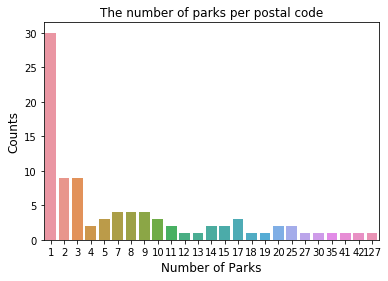

In [198]:
#EDA 1

#get the values for the park count per zip code
temp = df.park_count.value_counts()
sns.barplot(temp.index, temp.values)
plt.title("The number of parks per postal code")
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Number of Parks', fontsize=12)
plt.show()

Based on the graph, most zip region have only one parks

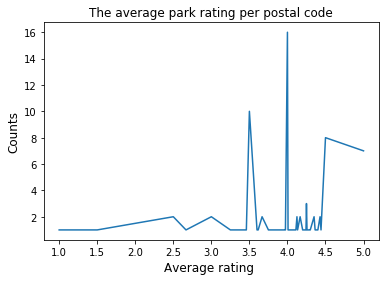

In [200]:
#EDA 2

temp = df.rating_mean.value_counts()
sns.lineplot(temp.index, temp.values)
plt.title("The average park rating per postal code")
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Average rating ', fontsize=12)
plt.show()

Based on the graph, most commen average rating is 4.0

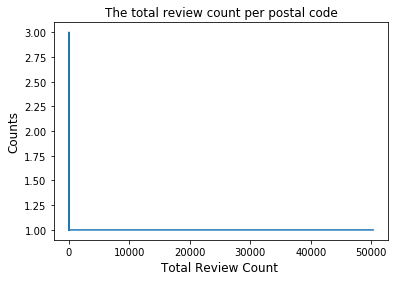

In [204]:
#EDA 3

temp = df.review_count_total.value_counts()
sns.lineplot(temp.index, temp.values)
plt.title("The total review count per postal code")
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Total Review Count ', fontsize=12)
plt.show()

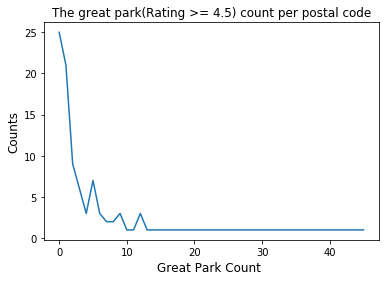

In [205]:
#EDA 4

temp = df.great_park_count.value_counts()
sns.lineplot(temp.index, temp.values)
plt.title("The great park(Rating >= 4.5) count per postal code")
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Great Park Count ', fontsize=12)
plt.show()

Based on the graph, most regions have 0 great park 

In [223]:
#Linear regression -1 
x_list = ['park_count','rating_mean','review_count_total','great_park_count','population']
X = df[['park_count','rating_mean','review_count_total','great_park_count','population']].values
X = normalize(X,axis = 0)
X
y1 = df[['poverty_mean']].values

X2 = sm.add_constant(X)
est = sm.OLS(y1, X2)
est2 = est.fit()
print(est2.summary())
print('----------------------------------------------')
print("[x1,x2,x3,x4,x5] are "+str(x_list))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     3.921
Date:                Wed, 16 Dec 2020   Prob (F-statistic):            0.00301
Time:                        17:00:40   Log-Likelihood:                -356.03
No. Observations:                  91   AIC:                             724.1
Df Residuals:                      85   BIC:                             739.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.3914      9.623      2.223      0.0

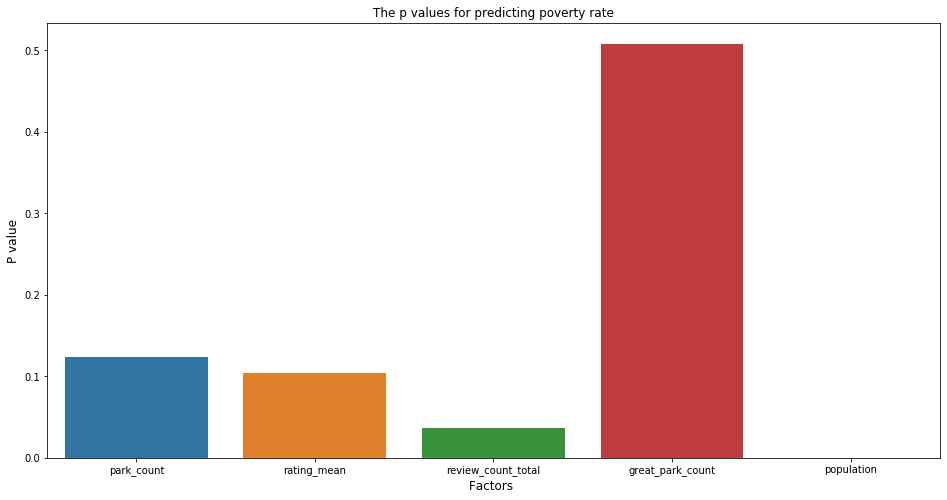

In [235]:
#Linear regression -1 continue
plt.figure(figsize=(16, 8))
sns.barplot(x_list, est2.pvalues[1:])
plt.title("The p values for predicting poverty rate")
plt.ylabel('P value', fontsize=12)
plt.xlabel('Factors ', fontsize=12)

plt.show()


#### linear regression 1: Conclusion

- From the coef part we can get the park_count, average rating, greate_park_count have negative impact on the poverty rate, while park review count and population have a positivive impact on the poverty rate.


- From the p value and the absolute values of coef we can get the review_count_total and population are highly related with poverty rate.(P value <0.05)

In [224]:
#Linear regression -2


y2 = df[['unemployment_mean']].values

X2 = sm.add_constant(X)
est = sm.OLS(y2, X2)
est2 = est.fit()
print(est2.summary())
print('----------------------------------------------')
print("[x1,x2,x3,x4,x5] are "+str(x_list))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     6.212
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           5.89e-05
Time:                        17:00:54   Log-Likelihood:                -210.57
No. Observations:                  91   AIC:                             433.1
Df Residuals:                      85   BIC:                             448.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8634      1.946      5.582      0.0

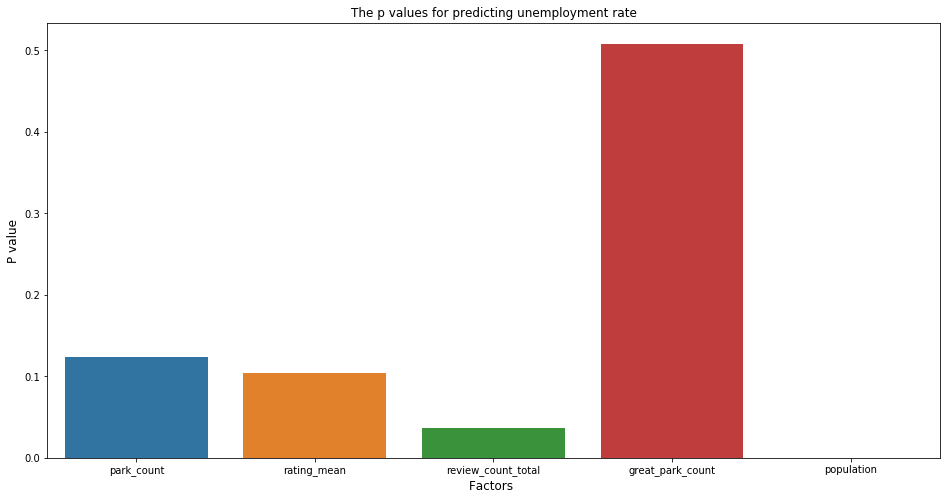

In [236]:
#Linear regression -1 continue
plt.figure(figsize=(16, 8))
sns.barplot(x_list, est2.pvalues[1:])
plt.title("The p values for predicting unemployment rate")
plt.ylabel('P value', fontsize=12)
plt.xlabel('Factors ', fontsize=12)

plt.show()

#### linear regression 2: Conclusion

- From the coef part we can get the park_count, average rating, greate_park_count have negative impact on the unemplotyment rate, while park review count and population have a positivive impact on the unemployment rate.


- From the p value and the absolute values of coef we can get the review_count_total and population are highly related with unemployment rate (P value <0.05).

# Ethics & Privacy

The dataset was given for use in the final project, so I had permission to use the dataset for this purpose. Also, the data source, Yelp and CA government, enable the public use the their data.

One potential area for concern would be the privacy of the person rating the Parks on yelp. However, this is not problem for this analysis as the names of the people rating the restaurant on yelp were not attached to the dataset and there is no way in this analysis to identify the users contributing to that yelp rating. Also, the datasets I used contain the Park names,which may affect the impression for certain Parks. To solve this issue, in the data cleaning part, I drop the Park names and only keep the counts for each zip code.


There is a potential bias for the Yelp rating for the parks. As people have different standards for parks. However, as Yelp calcuate the average rates for each park, so this bias should be minimized.

One possible unintended consequence of this analysis could be emphasizing negative qualities of certain region. Even though the data about the poverty rate and unemployment rate in certain region is open to public, this project could highlight the high poverty rate and unemployment rate in certain region. But such problem won't have too much negative influence as I focus on the relationship between features instead of the performance and population composition for certain region.



# Conclusion & Discussion

Different with my hypothesis, only the count of reviews and population have significant relationship with poverty rate and unemployment rate. Also, the relationship between the count of review and poverty rate is opposite than I thought. I thought if more people visit the local parks and write reviews, more people in this region have the money and available time, so the poverty rate and unemployment rate should be lower. However, the result is opposite to my intuition and I need more data and analysis to figure out the answer of that problem.

As the quality of the dataset I used, I cannot run the analysis on smaller region. The zip code is the smallest region I can use to merge the input datasets. The further improvement on this project need other datasource to get more clear results